# Entregable 2
## Inteligencia Artificial

En este entregable se realizará la aplicación de Regresión Lineal y Regresión logística. 

## Regresión Lineal:

Trabajaremos con los datos de la clase de EDA [(Clase02)](https://github.com/andrescastro-itm/AI_ITM/blob/main/Clase02/EDA.ipynb). 

1. Deben cargar los datos y realizar una depuración de los mismos (pueden usar lo que se hizo en la clase de EDA)

2. Realizar una división del conjunto de entrenamiento en conjuntos de entrenamiento/prueba, con los porcentajes que consideren

3. Posteriormente, deben entrenar un regresor lineal y reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba

4. Realizar una remoción de algunas características (a discreción de ustedes) y realizar de nuevo el entrenamiento del regresor lineal. Reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba.

In [1]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Celda para la carga de datos:

In [2]:
df = pd.read_csv("train.csv",index_col=0)

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [27]:
df = df.fillna({'LotFrontage': df['LotFrontage'].mean(), 'MasVnrArea': df['MasVnrArea'].mean(), 'GarageYrBlt': df['GarageYrBlt'].mean()})

In [28]:
def clean_data(df):
    # Drop column: 'Alley'
    df = df.drop(columns=['Alley'])
    # Drop column: 'PoolQC'
    df = df.drop(columns=['PoolQC'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
numerical_features_all = df_clean.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

string_columns = df_clean.select_dtypes(include=['object']).columns
print(string_columns)

Columnas numéricas: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
     

In [30]:
df_str = pd.get_dummies(df_clean, columns=string_columns)
df_str

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
df = pd.concat([df_str, df_num], axis=1)


In [38]:
df.isnull().any()

MSSubClass     False
LotFrontage    False
LotArea        False
OverallQual    False
OverallCond    False
               ...  
PoolArea       False
MiscVal        False
MoSold         False
YrSold         False
SalePrice      False
Length: 326, dtype: bool

In [41]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Solución a punto 1.

## Solución a punto 2.

In [39]:
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Solución a punto 3.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un objeto de regresión lineal
regressor = LinearRegression()

# Ajustar el regresor a los datos de prueba
regressor.fit(X_test, y_test)

# Hacer predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el error cuadrado medio
mse = mean_squared_error(y_test, y_pred)
mse

203690076.28081372

## Solución a punto 4

In [42]:
import seaborn as sns

## Esto hay que diseccionarlo más para mejor visualización y elección de los elementos a remover

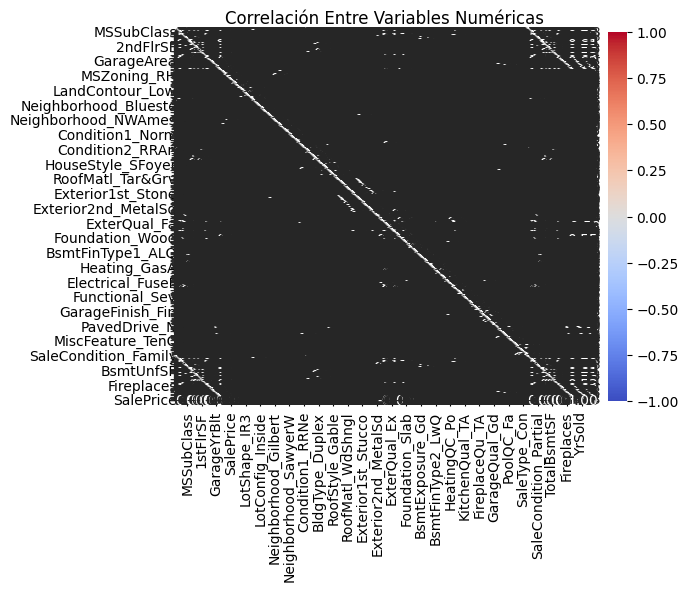

In [44]:
#plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación Entre Variables Numéricas')
plt.show()

In [ ]:
# Choose the features to remove
features_to_remove = ['Feature1', 'Feature2']

# Drop the selected features from the dataframe
df_reduced = df.drop(features_to_remove, axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('SalePrice', axis=1), df_reduced['SalePrice'], test_size=0.2, random_state=42)

# Create a linear regressor object
regressor_reduced = LinearRegression()

# Fit the regressor to the training data
regressor_reduced.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reduced = regressor_reduced.predict(X_test)

# Calculate the mean squared error
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
mse_reduced


## Regresión Logística:

Estos puntos los deben trabajar con **alguno (o si prefieren, todos)** de los conjuntos de datos del proyecto final. 

Lo pueden realizar de dos formas:

- Seleccionar únicamente los datos correspondientes a las clases 1 y 2, es decir, los datos con etiqueta Sabana o Bosque. Verificar que les deben quedar en total 29540 datos entre los conjuntos de entrenamiento, validación y prueba. ó
- Trabajar con las tres clases aprovechando que sklearn utiliza el esquema uno-contra-todos (one-vs-rest OvR)

Realizar las siguientes tareas:

1. Entrenar un modelo de regresión logística con el conjunto de entrenamiento
2. Reportar los resultados logrados con el conjunto de validación en términos de precisión, recall y F1-score. Para este punto pueden usar [classification_report de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
3. Mostrar una matriz de confusión para la clasificación hecha en el conjunto de validación


## Solución a punto 1.

## Solución a punto 2.

## Solución a punto 3.